# Preparación de los datos y Modelo Naive Bayes y SVM
## Profesor: Kevin Sossa
## Curso: Machine Learning
## Estudiante: 

> En este notebook se presenta la preparación de los datos y la implementación de dos modelos de clasificación: Naive Bayes y SVM. Para ello, se utiliza el dataset de Kaggle: [Home Loan Approval](https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval/data?select=loan_sanction_train.csv).

1. [Preparación de los datos](1)

    a. Características del dataset

    b. Limpieza de los datos
    
    c. Análisis exploratorio de los datos
    
    d. Preparación de los datos
    
        1. Codificación de variables categóricas
        
        2. Escalado de los datos
        
        3. División de los datos
        
2. [Modelo Naive Bayes](#2.-Modelo-Naive-Bayes)
3. [Modelo SVM](#3.-Modelo-SVM)
4. [Conclusiones](#4.-Conclusiones)

# 1. Librerias y Cargar Datos


In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.color_palette("viridis", as_cmap=True)

# librerias preparación de dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# librerias modelos arbol, svm y naive
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 

# librerias metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# warnings
import warnings
warnings.filterwarnings('ignore')




In [2]:
# cargar datos
data = pd.read_csv('datos\loan_sanction_train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


 ------             --------------  -----  
0   Loan_ID   is the unique identifier for each row

1   Gender             es el género del solicitante.

2   Married           es el estado civil del solicitante.

3   Dependents         es el número de dependientes del solicitante.

4   Education          es el nivel de educación del solicitante.

5   Self_Employed      es el estado de empleo del solicitante.

6   ApplicantIncome    es el ingreso del solicitante.
 
7   CoapplicantIncome  es el ingreso del co-solicitante.
    
8   LoanAmount         es la cantidad del préstamo.
    
9   Loan_Amount_Term   es el plazo del préstamo.
    
10  Credit_History     es el historial crediticio del solicitante.
    
11  Property_Area      es el área de la propiedad.
    
12  Loan_Status        es el estado del préstamo.
    



In [4]:
data.shape

(614, 13)

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 2. Limpieza de los datos

In [6]:
# datos nulos
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
#Eliminar  filas nulas en Gender,  
data_limpio = data.copy()

data_limpio = data_limpio[data_limpio["Gender"].notnull()]
                                 


In [26]:
# imputar valores nulos en Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History
data_limpio["Married"].fillna(data_limpio["Married"].mode()[0], inplace=True)
data_limpio["Dependents"].fillna(data_limpio["Dependents"].mode()[0], inplace=True)
data_limpio["Self_Employed"].fillna(data_limpio["Self_Employed"].mode()[0], inplace=True)
data_limpio["LoanAmount"].fillna(data_limpio["LoanAmount"].median(), inplace=True)
data_limpio["Loan_Amount_Term"].fillna(data_limpio["Loan_Amount_Term"].median(), inplace=True)
data_limpio["Credit_History"].fillna(data_limpio["Credit_History"].median(), inplace=True)

data_limpio.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
data_limpio.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,601,601,601,601,601,601.000000,601.000000,601.000000,601.000000,601.000000,601,601
unique,601,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,391,353,468,523,NaN,NaN,NaN,NaN,NaN,227,414
mean,NaN,NaN,NaN,NaN,NaN,NaN,5296.818636,1624.610516,144.357737,342.429285,0.856905,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5796.332957,2947.638410,81.107995,64.717505,0.350461,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2882.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3813.000000,1167.000000,127.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5746.000000,2306.000000,162.000000,360.000000,1.000000,NaN,NaN


In [ ]:
data_limpia = data_limpio.drop(columns = ['Loan_ID', 'Loan_Amount_Term'])
data_limpia.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 3. EDA

## Distribuciones

count    601.000000
mean     144.357737
std       81.107995
min        9.000000
25%      100.000000
50%      127.000000
75%      162.000000
max      650.000000
Name: LoanAmount, dtype: float64


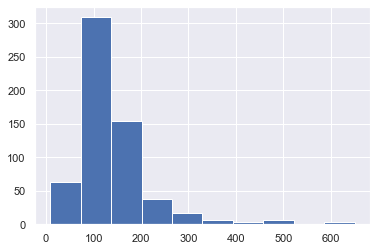

In [21]:
print(data_limpio['LoanAmount'].describe())
data_limpio['LoanAmount'].hist()
plt.show()

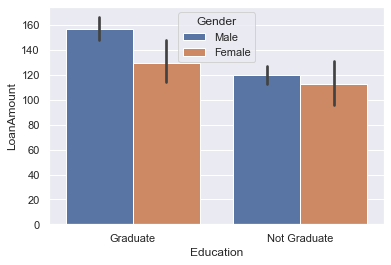

In [ ]:
sns.barplot(x='Education', y ='LoanAmount', hue ='Gender', data = data_limpio)
plt.show()


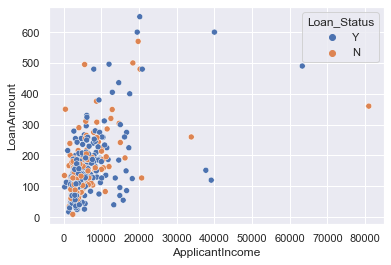

In [35]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount',hue ='Loan_Status', data=data_limpio)
plt.show()

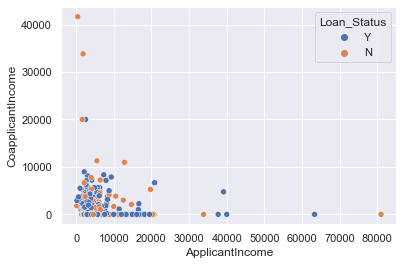

In [41]:
sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome',hue ='Loan_Status', data=data_limpio)
plt.show()

<AxesSubplot:xlabel='LoanAmount', ylabel='LoanAmount'>

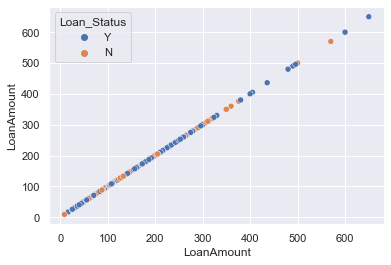

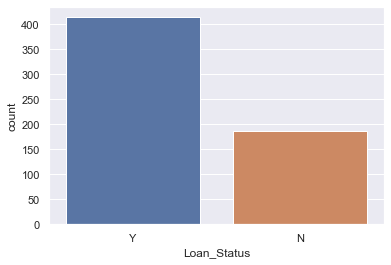

In [ ]:
# Barras
sns.countplot(x='Loan_Status', data=data_limpio)
plt.show()

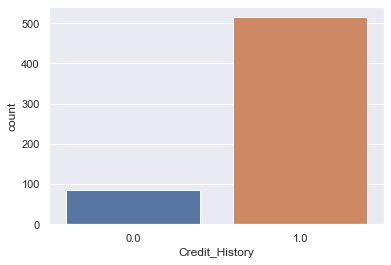

In [46]:
# bar 
sns.countplot(x='Credit_History', data=data_limpio)
plt.show()

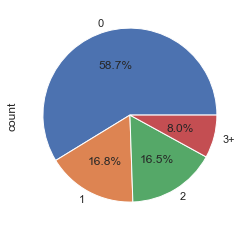

In [47]:
# pie Dependents
data_limpio['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

## 4. Preparar Datos

### 4.1 Codificación de variables categóricas
- One Hot Encoding
- Label Encoding

In [ ]:
# one hot encoding

# Modelo SVM

> Este modelo se basa en la idea de encontrar el hiperplano que mejor separe las clases. Para ello, se utiliza la función de pérdida hinge y se minimiza el error de clasificación.
Se caracteriza por:

### **Support Vector Machine (SVM): Explicación en bullets**  

- **Definición**: SVM es un modelo de aprendizaje supervisado utilizado para clasificación y regresión, aunque se usa principalmente en tareas de clasificación.  
- **Idea clave**: Encuentra el **hiperplano óptimo** que separa las clases de datos con el mayor margen posible.  
- **Hiperplano**: Es una línea (en 2D) o un plano (en 3D) que divide el espacio de características en dos partes, cada una correspondiente a una clase.  
- **Margen**: Es la distancia más cercana entre el hiperplano y los puntos de datos más cercanos de cualquier clase. El objetivo es maximizar este margen.  
- **Soportes**: Los puntos más cercanos al hiperplano se llaman **vectores de soporte** y son críticos para definir el hiperplano óptimo.  
- **No linealidad**: Usa funciones núcleo (kernels) para transformar datos no lineales en un espacio de mayor dimensión donde sean linealmente separables.  
  - Ejemplos de kernels: lineal, radial base function (RBF), polinómico y sigmoidal.  
- **Regularización (C)**: Controla la flexibilidad del modelo, equilibrando el margen amplio y la clasificación correcta de puntos mal clasificados.  
- **Aplicaciones**: Clasificación de texto (spam o no spam), reconocimiento de imágenes, bioinformática, entre otros.  
- **Ventaja**: Funciona bien con conjuntos de datos de alta dimensionalidad y es robusto frente a datos ruidosos.  
- **Desventaja**: Puede ser computacionalmente costoso en conjuntos de datos muy grandes o complejos.  




In [ ]:
# Scores and probabilities
"""The decision_function method of SVC and NuSVC gives per-class scores for each sample (or a single score per sample in the binary case). When the constructor option probability is set to True, class membership probability estimates (from the methods predict_proba and predict_log_proba) are enabled. """

# Modelo Naive Bayes

> Este modelo se basa en el teorema de Bayes y asume que las características son independientes entre sí. Se caracteriza por:

- Función de pérdida: Logarítmica
- Regularización: No aplica
- Parámetros: No aplica



### **Naive Bayes**  

- **Definición**: Modelo probabilístico basado en el **Teorema de Bayes** que asume independencia entre las características del conjunto de datos.  
- **Teorema de Bayes**:  

  $$
  P(A|B) = \frac{P(B|A)P(A)}{P(B)}
  $$
  
  Donde \(P(A|B)\) es la probabilidad posterior de \(A\) dado \(B\).  
- **Suposición clave (Naive)**: Las características son **condicionalmente independientes** entre sí, lo cual simplifica los cálculos.  
- **Tipos principales**:  
  - **Gaussian Naive Bayes**: Para datos continuos, asume distribución normal.  
  - **Multinomial Naive Bayes**: Para datos discretos como recuentos (e.g., texto).  
  - **Bernoulli Naive Bayes**: Para datos binarios (e.g., presencia o ausencia de palabras).  
- **Ventajas**:  
  - Rápido y eficiente, incluso con conjuntos de datos grandes.  
  - Funciona bien con datos de alta dimensionalidad (como texto).  
  - Fácil de implementar.  
- **Desventajas**:  
  - La suposición de independencia rara vez es válida en datos reales.  
  - No maneja bien datos con correlación fuerte entre características.  
- **Aplicaciones**:  
  - Clasificación de correos electrónicos (spam/no spam).  
  - Detección de sentimiento en texto.  
  - Predicción de categorías de productos o clientes.  
- **Fórmula práctica**: Clasifica una instancia en la clase con la mayor probabilidad posterior.  



### Teorema de Bayes en Naive Bayes

La probabilidad posterior se calcula como:

$$P(C_k | X) = \frac{P(X | C_k) \cdot P(C_k)}{P(X)}$$

Donde:
- \(P(C_k | X)\): Probabilidad posterior de la clase \(C_k\) dado los datos \(X\).
- \(P(X | C_k)\): Verosimilitud de los datos \(X\) dado la clase \(C_k\).
- \(P(C_k)\): Probabilidad previa de la clase \(C_k\).
- \(P(X)\): Probabilidad de los datos \(X\) (normalizador).

### Fórmula extendida para múltiples características

Dado que \(X = \{x_1, x_2, ..., x_n\}\), y asumiendo independencia condicional entre las características:

$$
P(C_k | X) = \frac{P(C_k) \cdot \prod_{i=1}^n P(x_i | C_k)}{P(X)}
$$

### Predicción final

La clase seleccionada será aquella con la mayor probabilidad posterior:

$$\hat{C} = \arg\max_{C_k} P(C_k | X)$$


In [ ]:
# peso de cada variable
